# Business Case: LoanTap Logistic Regression

Task:
Given a set of attributes for an Individual, we need to determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations.

steps:
* Data Cleaning
* Missing value fixing
* Outlier treatment
* Performing EDA
* Generating logistic regression model
* Finding the accuracy of model and finding the metrics.
* generating Insights and giving recomendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [131]:
df=pd.read_csv('logistic_regression.csv')

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

* We have 396030 samples which are quite enough for training the logisitic Regression model.
* Here we see some there are some null values in our data set. 
* Data contains both categorical and numerical values.

In [6]:
df.columns[df.isna().any()].tolist()

['emp_title',
 'emp_length',
 'title',
 'revol_util',
 'mort_acc',
 'pub_rec_bankruptcies']

In [7]:
df.isnull().sum()/len(df.index)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Here, we can see That 'emp_title','emp_length','mort_acc' has significant NULLs in them. Rest all features are having very small of Nulls. we can drop them.

emp_title ---- it is a categorical variable

emp_length ---- it is a categorical variable

mort_acc ----- it is numerical variable

<AxesSubplot:xlabel='mort_acc'>

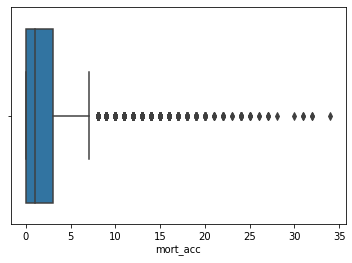

In [119]:
sns.boxplot(df['mort_acc'])

As mort_acc is a numerical column so we can replace the null values with meadian

In [132]:
df['mort_acc'].fillna(df['mort_acc'].median(), inplace = True)

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


Here we see that mean and 50 percentile of some of the columns (loan_amnt, installment, annual_inc, )
have significant differences which shows the presence of outliers.

For em_title column we can replace null values with unknown and for emp_length as length varies from 0 to 10 so here we can replace it with 5 years

In [133]:
df['emp_title'].fillna('unkown_title', inplace = True)
df['emp_length'].fillna('5 years', inplace = True)

Now we can drop all other null values row.

In [134]:
df=df.dropna()

In [135]:
df.isnull().any()

loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
emp_title               False
emp_length              False
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
loan_status             False
purpose                 False
title                   False
dti                     False
earliest_cr_line        False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util              False
total_acc               False
initial_list_status     False
application_type        False
mort_acc                False
pub_rec_bankruptcies    False
address                 False
dtype: bool

Now we see that all the null values have been removed.

In [136]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

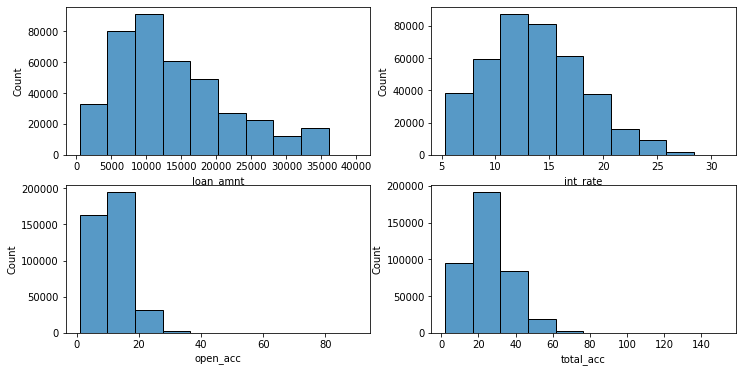

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.histplot(ax=axes[0,0], x = df['loan_amnt'], bins=10)
sns.histplot(ax=axes[0,1], x = df['int_rate'], bins=10)
sns.histplot(ax=axes[1,0], x = df['open_acc'], bins=10)
sns.histplot(ax=axes[1,1], x = df['total_acc'], bins=10)

* Majority of loan amount lies between 5K to 20K
* Intrest rate is normally distributed between 5 to 20 percent
* The majority of loan amount approved lies in range 10K to 20K
* open_acc : The number of open credit lines in the borrower's credit file. So it lies mostly between 0 to 25

<AxesSubplot:xlabel='loan_status', ylabel='count'>

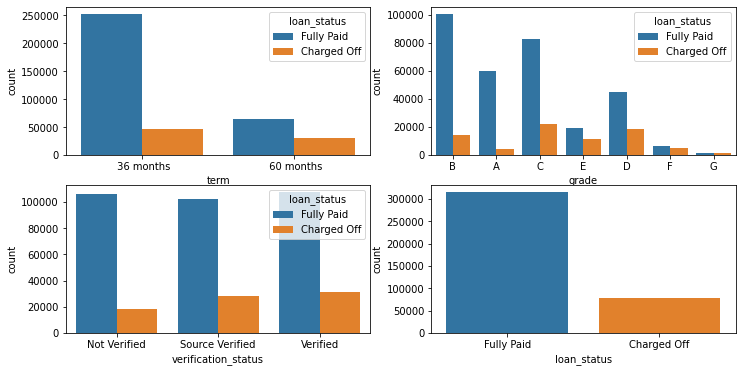

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
sns.countplot(ax=axes[0,0], x = df['term'], hue=df['loan_status'])
sns.countplot(ax=axes[0,1], x = df['grade'], hue=df['loan_status'])
sns.countplot(ax=axes[1,0], x = df['verification_status'], hue=df['loan_status'])
sns.countplot(ax=axes[1,1], x = df['loan_status'])

* Most people are opting for 36 months EMI plan.
* B, C, A and D are most occuring loan grades
* There are almost equal numbers in verification status column
* There are huge number of fully paid loans as compared to charged off loans

In [139]:
df['loan_status'].value_counts(normalize=True)*100

Fully Paid     80.380974
Charged Off    19.619026
Name: loan_status, dtype: float64

Almost 20 percent loans are not payed back fully (This is our target variable).

<AxesSubplot:xlabel='emp_length', ylabel='count'>

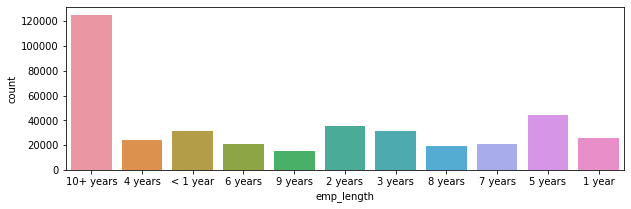

In [140]:
plt.figure(figsize=(10,3))
sns.countplot(df['emp_length'])

* Most of the employees working for more than 10 years are taking loans.
* Other than employees who are working for more than 10 years, mostly 0 to 3 years of working employees are taking loans.

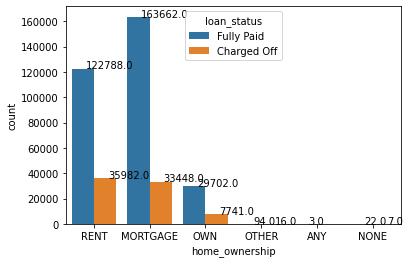

In [141]:
ax=sns.countplot(df['home_ownership'], hue=df['loan_status'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Maximum loan taking people are either living in rented home or has mortgage their home.

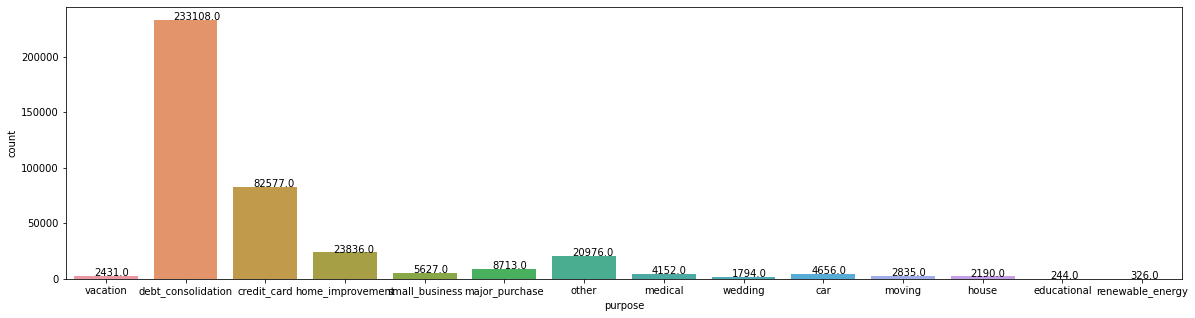

In [142]:
plt.figure(figsize=(20,5))
ax=sns.countplot(df['purpose'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

Majority of loans are taken for debt consolidation, credit card and home improvement

<AxesSubplot:xlabel='count', ylabel='title'>

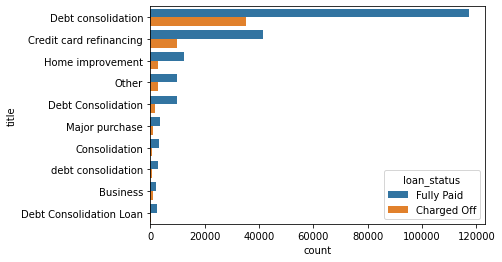

In [143]:
sns.countplot(y = 'title', order = df['title'].value_counts().index[0:10],data=df, hue=df['loan_status'])

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

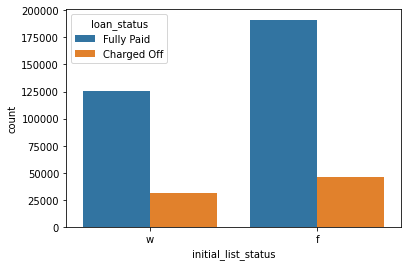

In [144]:
sns.countplot(df['initial_list_status'], hue=df['loan_status'])

In [145]:
df['application_type'].value_counts()

INDIVIDUAL    392844
JOINT            356
DIRECT_PAY       265
Name: application_type, dtype: int64

There are huge number of individual loan in comparison of joint and direct pay loans

<AxesSubplot:xlabel='mort_acc', ylabel='count'>

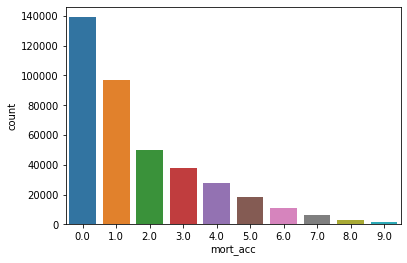

In [146]:
sns.countplot(df['mort_acc'],order = df['mort_acc'].value_counts().index[0:10])

In [147]:
df['pub_rec_bankruptcies'].value_counts()

0.0    348599
1.0     42555
2.0      1837
3.0       347
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

<AxesSubplot:>

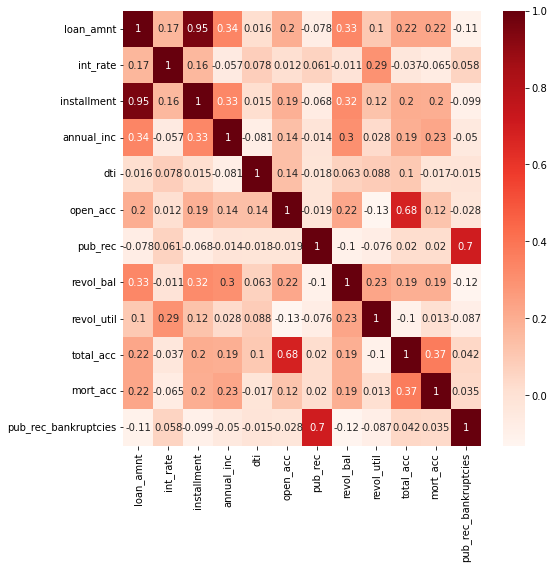

In [148]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

corrleated factors are:
* loan amount and installment
* open_acc and total_acc
* pub_rec and pub_rec_bankruptcies

So we can drop one from each one of them while building model.

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

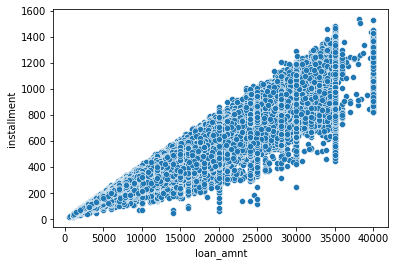

In [149]:
sns.scatterplot(x=df['loan_amnt'], y=df['installment'])

It is clear from graph that installment and loan amount are highly correlated. From heat map we can see correlation factor is 0.95 very close to 1.

<AxesSubplot:xlabel='grade', ylabel='count'>

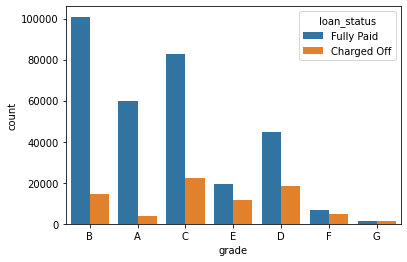

In [150]:
sns.countplot(df['grade'], hue=df['loan_status'])

People with grade A are more likely to repay loan

<AxesSubplot:xlabel='emp_title', ylabel='count'>

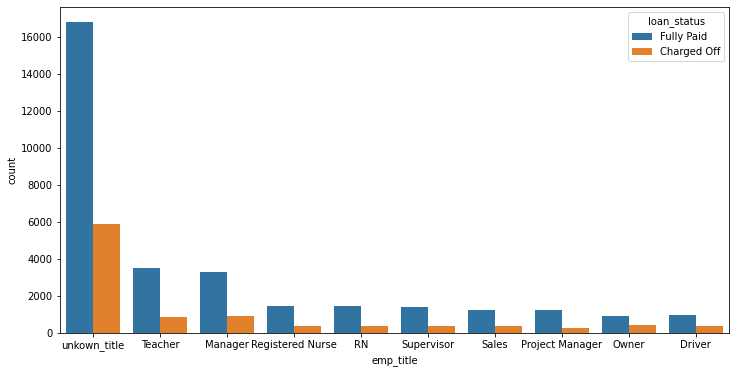

In [151]:
plt.figure(figsize=(12,6))
sns.countplot(df['emp_title'],order = df['emp_title'].value_counts().index[0:10], hue=df['loan_status'])

Mostly Teacher and manager have repayed the loans.

#  Data cleaning and feature enginnering

In [152]:
df['emp_length'].value_counts()

10+ years    125270
5 years       44429
2 years       35597
< 1 year      31489
3 years       31469
1 year        25637
4 years       23811
6 years       20750
7 years       20727
8 years       19071
9 years       15215
Name: emp_length, dtype: int64

In [153]:
df['emp_length'] = df['emp_length'].replace ( ['< 1 year'],'0 year')
df['emp_length'] = df['emp_length'].replace ( ['10+ years'],'10 year')

In [154]:
df['emp_length'].value_counts()

10 year    125270
5 years     44429
2 years     35597
0 year      31489
3 years     31469
1 year      25637
4 years     23811
6 years     20750
7 years     20727
8 years     19071
9 years     15215
Name: emp_length, dtype: int64

In [155]:
 df[['emp_age','y']] = df['emp_length'].str.split(' ', expand = True)

In [156]:
df.drop(['emp_length','y'],axis=1 ,inplace=True)

In [157]:
df['emp_age'] = df['emp_age'].astype(int)

In [158]:
df['emp_age'].value_counts()

10    125270
5      44429
2      35597
0      31489
3      31469
1      25637
4      23811
6      20750
7      20727
8      19071
9      15215
Name: emp_age, dtype: int64

In [159]:
df['term'].value_counts()

 36 months    300024
 60 months     93441
Name: term, dtype: int64

term has months after numerical data so it makes it object type so to make it useful we need to remove months and make its data type as intger

In [160]:
a = df['term'].str.split(' ',expand = True)

In [161]:
df['term'] = a[1].astype(int)

In [162]:
df.describe(include=object)

,grade,sub_grade,emp_title,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465,393465
unique,7,35,172227,6,3,112,2,14,48472,683,2,3,391162
top,B,B3,unkown_title,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Smith\r\nFPO AP 70466
freq,115395,26518,22668,197110,138867,14838,316271,233108,152392,2999,236947,392844,8


'issued date' and 'earliest_cr_line' are dates. So changing their data type to date time.

In [163]:
df['issue_d']=df['issue_d'].astype('datetime64[ns]')
df['earliest_cr_line']=df['earliest_cr_line'].astype('datetime64[ns]')

In [164]:
import datetime
now=datetime.datetime.now()
df['current_date'] = pd.Series([now.date() for x in range(len(df.index))])
df['current_date']=df['current_date'].astype('datetime64[ns]')
df["credit_line_Age"] = (df['current_date'] - df['earliest_cr_line']) / np.timedelta64(1, 'D')
df["loan_Age"] = (df['current_date'] - df['issue_d']) / np.timedelta64(1, 'D')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_age,current_date,credit_line_Age,loan_Age
0,10000.0,36,11.44,329.48,B,B4,Marketing,RENT,117000.0,Not Verified,...,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",10,2023-01-19,11920.0,2940.0
1,8000.0,36,11.99,265.68,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,...,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",4,2023-01-19,6776.0,2940.0
2,15600.0,36,10.49,506.97,B,B3,Statistician,RENT,43057.0,Source Verified,...,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0,2023-01-19,5650.0,2940.0
3,7200.0,36,6.49,220.65,A,A2,Client Advocate,RENT,54000.0,Not Verified,...,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",6,2023-01-19,5984.0,3001.0
4,24375.0,60,17.27,609.33,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,...,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",9,2023-01-19,8725.0,3580.0


Removing the columns current_date, earliest_cr_line, issue_d as they are no usefull for our analysis.

In [165]:
df.drop(['current_date','earliest_cr_line','issue_d'],inplace=True,axis='columns')

In [166]:
df.describe(include=object).T

,count,unique,top,freq
grade,393465,7,B,115395
sub_grade,393465,35,B3,26518
emp_title,393465,172227,unkown_title,22668
home_ownership,393465,6,MORTGAGE,197110
verification_status,393465,3,Verified,138867
loan_status,393465,2,Fully Paid,316271
purpose,393465,14,debt_consolidation,233108
title,393465,48472,Debt consolidation,152392
initial_list_status,393465,2,f,236947
application_type,393465,3,INDIVIDUAL,392844


Here we see unique values of emp_title and title are very large so we can either drop them or we can go for target encoding.
So let us drop title column.

In [167]:
df.drop(['title'], axis = 1, inplace = True)

Sub grade is further categorization of grade, so let us drop this column also.

In [168]:
df.drop(['sub_grade'], axis = 1, inplace = True)

In [169]:
df.describe(include=object).T

,count,unique,top,freq
grade,393465,7,B,115395
emp_title,393465,172227,unkown_title,22668
home_ownership,393465,6,MORTGAGE,197110
verification_status,393465,3,Verified,138867
loan_status,393465,2,Fully Paid,316271
purpose,393465,14,debt_consolidation,233108
initial_list_status,393465,2,f,236947
application_type,393465,3,INDIVIDUAL,392844
address,393465,391162,USS Smith\r\nFPO AP 70466,8


Let's explore the adress feauture

In [170]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 393465, dtype: object

In [171]:
df['zip_code'] = df['address'].apply(lambda x: x[-5:])

In [172]:
df['zip_code'].value_counts()

70466    56629
22690    56157
30723    56129
48052    55560
00813    45512
29597    45200
05113    45120
11650    11149
93700    11088
86630    10921
Name: zip_code, dtype: int64

<AxesSubplot:xlabel='zip_code', ylabel='count'>

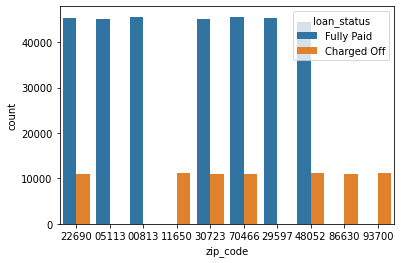

In [173]:
sns.countplot(df['zip_code'], hue = df['loan_status'])

In [174]:
df.drop(['address'], axis=1, inplace = True)

# Outlier treatment

In [175]:
col = list(df.select_dtypes('number').columns)
col

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_age',
 'credit_line_Age',
 'loan_Age']

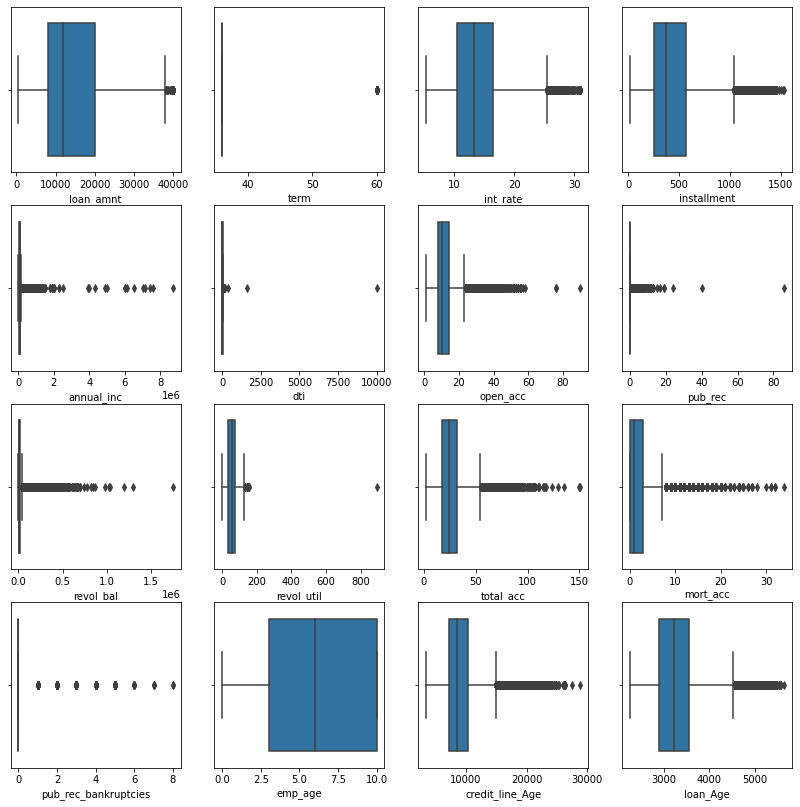

In [176]:
fig, axes = plt.subplots(4, 4, figsize=(14, 14))
k=0
for i in range(4):
    for j in range(4):
        sns.boxplot(ax=axes[i,j], x = df[col[k]])
        k+=1

Here we see all the numerical columns have outliers, but we cannot remove outliers from all columns.

we can remove outlies from loan_amnt, installment, annual_inc, dti, total_acc, revol_bal, credit_line_Age, loan_age

In [177]:
outliers = ['loan_amnt', 'installment', 'annual_inc', 'dti', 'revol_bal', 'total_acc', 'credit_line_Age', 'loan_Age']

In [178]:
h=df

In [179]:
for i,j in enumerate(outliers):
    q1=df[j].quantile(0.25)
    q3=df[j].quantile(0.75)
    iqr=q3-q1
    df=df[(df[j]>=q1-1.5*iqr)&(df[j]<=q3+1.5*iqr)]

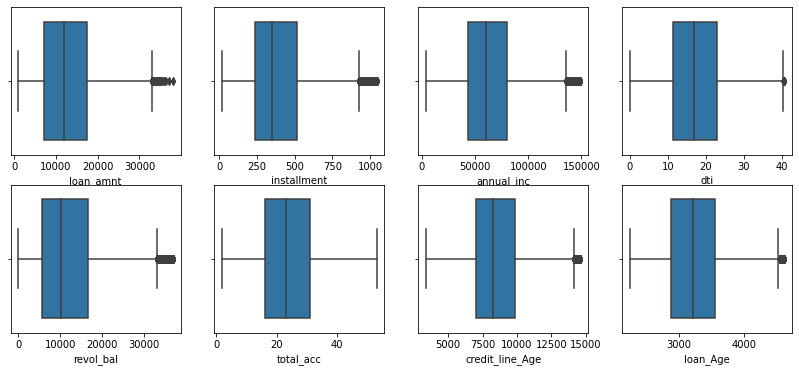

In [180]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
k=0
for i in range(2):
    for j in range(4):
        sns.boxplot(ax=axes[i,j], x = df[outliers[k]])
        k+=1

All most all the outliers has been removed by IQR outlier removal method

# Encoding Categorical Variables

We use one-hot encoding where categories don't have order. Where categories have order then we can go for label encoding.
When no. of categories are large we go for Target encoding.

In [181]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Performing Label encoding on following columns as order is important for therse columns.

In [182]:
df['loan_status'] = le.fit_transform(df['loan_status'])
df['grade'] = le.fit_transform(df['grade'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])

In [183]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

Performing target encoding of following columns based on loan status which is our target variable

In [184]:
df['emp_title'] = encoder.fit_transform(df['emp_title'],df['loan_status'])
df['purpose'] = encoder.fit_transform(df['purpose'],df['loan_status'])

We observe that there are not many unique values in application_type,initial_list_status,term and zip codes. We cannot just convert them into integers and keep them like that because in that case the model will interpret them incorrectly. The model might think that they are arranged in some order. Instead, we will convert these into dummy variables.

In [185]:
temp1=pd.get_dummies(df, columns=['application_type','initial_list_status','term','zip_code'], drop_first=True)
df=pd.concat([df,temp1],axis=1)

In [186]:
df.drop(['term','initial_list_status','application_type','zip_code'],axis='columns',inplace=True)

We can also drop one column from each of them 
* loan amount and installment
* open_acc and total_acc
* pub_rec and pub_rec_bankruptcies
as they are highly correlated.

So droping installment, open_acc and pub_rec_bankruptcies

In [187]:
df.drop(['installment','open_acc','pub_rec_bankruptcies'], axis=1, inplace = True)

In [195]:
df.columns

Index(['loan_amnt', 'int_rate', 'grade', 'emp_title', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'emp_age', 'credit_line_Age', 'loan_Age', 'loan_amnt', 'int_rate',
       'grade', 'emp_title', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'emp_age',
       'credit_line_Age', 'loan_Age', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w', 'term_60',
       'zip_code_05113', 'zip_code_11650', 'zip_code_22690', 'zip_code_29597',
       'zip_code_30723', 'zip_code_48052', 'zip_code_70466', 'zip_code_86630',
       'zip_code_93700'],
      dtype='object')

Many colums have been duplicated so let us remove those columns.

In [206]:
df = df.loc[:,~df.columns.duplicated()].copy()

In [208]:
df.shape

(319264, 31)

<AxesSubplot:>

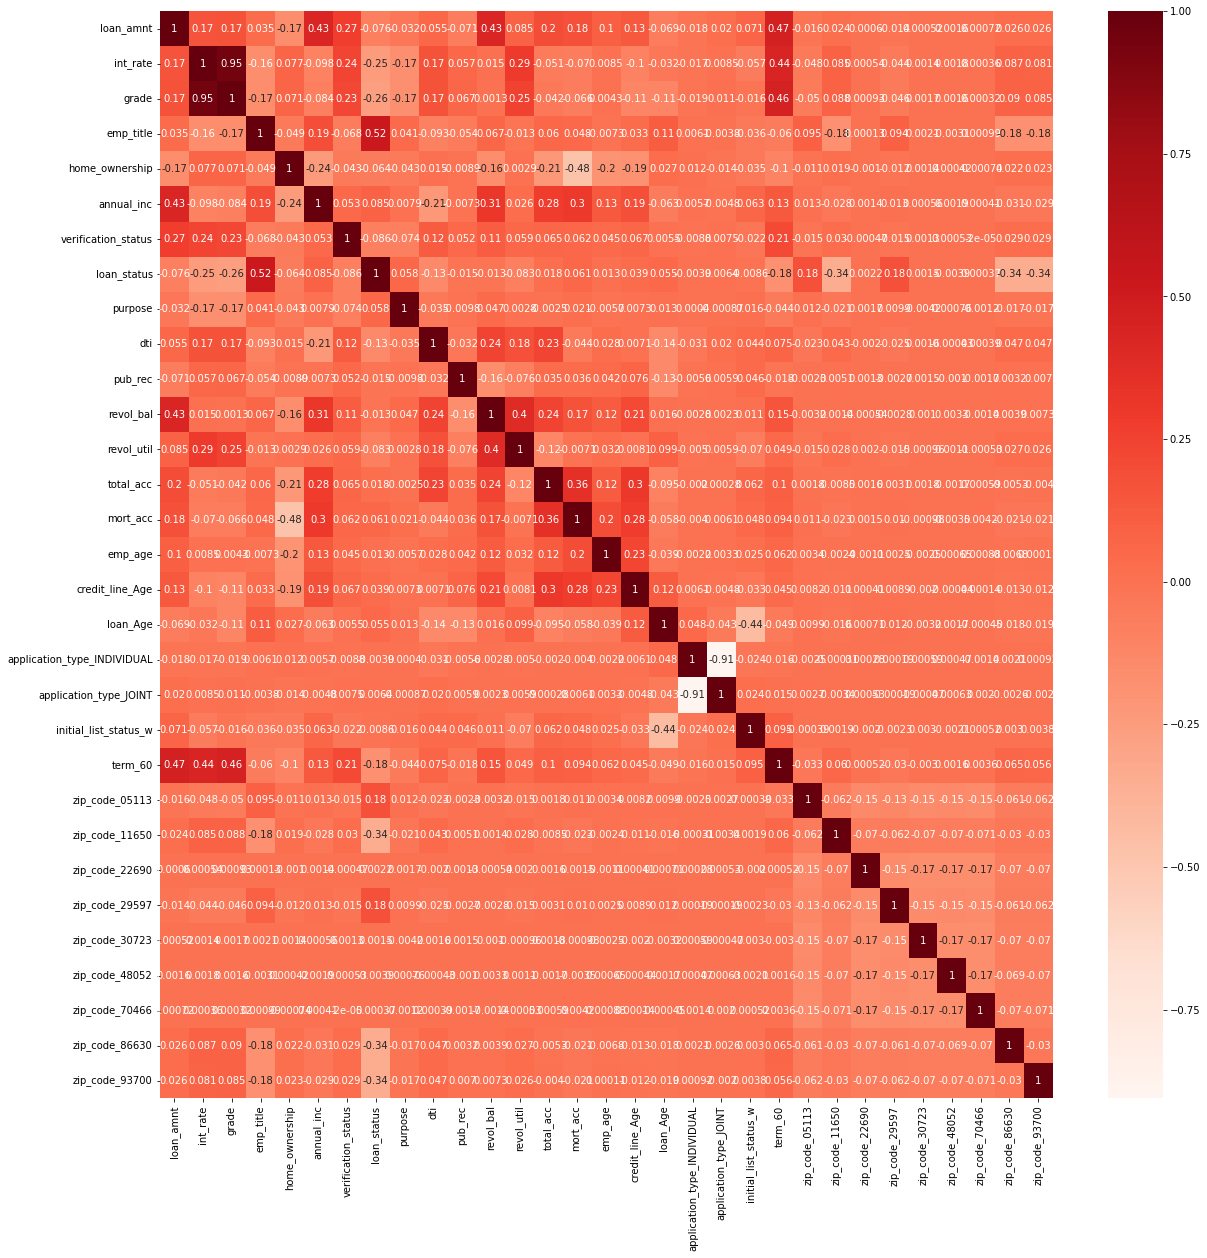

In [211]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

Intrest rate and grade is highly correlated so lets us drop intrest rate.

In [215]:
df.drop(['int_rate'], axis=1, inplace = True)

In [216]:
df.shape

(319264, 30)

# Model building

Splitting dependent and independent variable

In [217]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [218]:
X.shape

(319264, 29)

In [219]:
y.shape

(319264,)

* 80% is training data and 20% is test

* We know the importance of Validation data, hence we split the 80% data as 60% and 20%, where

* 60% is Training data and 20 % is cross Validation data

In [221]:
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(191558, 29)

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [223]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [224]:
model.coef_

array([[-1.31870451e-01, -3.81929499e-01,  1.42138115e+00,
        -1.30924651e-01, -2.93522253e-02,  1.09093837e-02,
         5.57627277e-02, -2.07077888e-01, -1.57990903e-03,
         3.19688813e-02, -1.44986359e-01, -5.44012635e-02,
         9.45687991e-02,  4.92092826e-02,  4.67125386e-02,
        -7.02845594e-02, -1.06134816e-02,  2.50595077e-02,
         2.63963027e-02, -2.38903817e-01,  1.16924539e+00,
        -3.09732232e+00, -2.59878448e+00,  1.18550421e+00,
        -2.60298232e+00, -2.60537706e+00, -2.63234818e+00,
        -3.09938234e+00, -3.07211405e+00]])

In [225]:
def logreg_to_dict(clf, feature_names):
    coefs = np.concatenate([clf.intercept_, clf.coef_.squeeze()])
    return dict(zip(["intercept"] + feature_names, coefs))

print(logreg_to_dict(model,X.columns.tolist()))

{'intercept': 4.4705439062704215, 'loan_amnt': -0.13187045136817718, 'grade': -0.3819294988038406, 'emp_title': 1.4213811509369223, 'home_ownership': -0.1309246506384362, 'annual_inc': -0.029352225301762097, 'verification_status': 0.01090938374900715, 'purpose': 0.05576272772744491, 'dti': -0.20707788795684007, 'pub_rec': -0.0015799090301647344, 'revol_bal': 0.031968881257202104, 'revol_util': -0.14498635944335178, 'total_acc': -0.05440126353942321, 'mort_acc': 0.09456879913253369, 'emp_age': 0.04920928263177118, 'credit_line_Age': 0.046712538583043174, 'loan_Age': -0.07028455944527966, 'application_type_INDIVIDUAL': -0.01061348157694665, 'application_type_JOINT': 0.025059507734277977, 'initial_list_status_w': 0.026396302721565172, 'term_60': -0.2389038166125234, 'zip_code_05113': 1.1692453895204298, 'zip_code_11650': -3.097322316606385, 'zip_code_22690': -2.598784475576222, 'zip_code_29597': 1.1855042094704233, 'zip_code_30723': -2.6029823246595343, 'zip_code_48052': -2.60537706480770

* Grade, employee title, loan amount, home ownership and zip code(location) are most Important features here as they are largest in Magnitude.

* Coeff of those feature which are positive effects the probability of x belonging to class 1 positively and vice-versa.

* High Grade means lower probablity of X belonging to class 1 as it has -ve coeff.

* It is clearly seen than zip code has very high effect on model its coefficient varies from -3 to +2

In [226]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.9217051754559976, Val Accuracy:0.9209120949681299


Let's start doing hyper parameter tuning on parameter  𝐶=1𝜆  to increase the performance of the model

In [227]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
    scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
    scaled_lr.fit(X_train, y_train)
    train_score = scaled_lr.score(X_train, y_train)
    val_score = scaled_lr.score(X_val, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

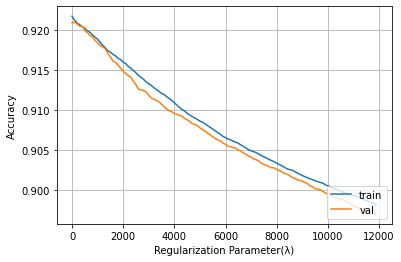

In [228]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

* Notice as Regularization is increasing, the Accuracy is keep on decreasing since model is moving towards Underfit
* What can we see from the increased value of Regularization Parameter?
* We see how the model starts underfitting and performing poorly on the train and validation data
* Now we pick that  λ  we are getting the maximum validation score

Maximum accuracy is shown at very low value so lets take it 1.

In [229]:
val_scores[1]

0.9209747388533037

* We observe that validation score is maximum of 92.92% accuracy when index = 1, thus our  λ  best becomes

In [230]:
l_best = 0.01 * 1 * 100

* We do this since we are stepping 100 in each iteration

Lets train model with best λ

In [231]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Now test this best model on our test data

In [232]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.9216168386763347


We have the maximum accuracy of 92.16 which matches with the train and cross validation accuracy.

In [233]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score,recall_score,f1_score

In [234]:
y_pred = scaled_lr.predict(X_test)

In [235]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[ 9427,  3511],
       [ 1494, 49421]], dtype=int64)

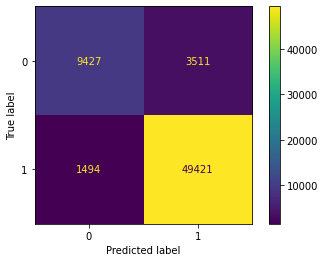

In [236]:
ConfusionMatrixDisplay(conf_matrix).plot()

In [237]:
precision_score(y_test,y_pred)

0.9336696138441775

Precision here is 0.933 which is good. Bad precision means we will get False positives.

This will lead to giving loan to people who couldnot pay.This will lead to NPA. So precision help us lower down Bank NPA

In [238]:
recall_score(y_test,y_pred)

0.9706569773151331

Recall is also good. Bad recall means more false negatives. This will lead to losing Important customers.

good recall will ensure that we will not lose any important customers

In [239]:
f1_score(y_test,y_pred)

0.9518040964110662

In [240]:
#Estimate the probability of belonging to class 1
probs=scaled_lr.predict_proba(X_test)[:,1]

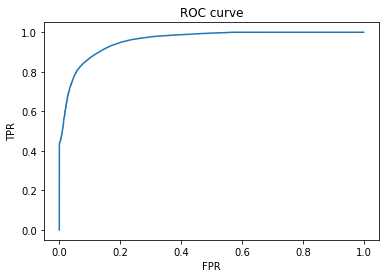

0.9582835228322167

In [241]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,thres=roc_curve(y_test,probs)
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
roc_auc_score(y_test,probs)

Here, AUC score is greater than 0.50. it means our model can predict the positive & Negative class well. Max score can be 1 but we got 0.958.

This can help us compare two models. we make many models for classification and choose the one with max AUC

Insights

* Here Grade and job_title are most Important columns. So we must look for these beore giving loan to someone.
* Grade, employee title, loan amount, home ownership and zip code(location) are most Important features here as they are largest in Magnitude.

* Coeff of those feature which are positive effects the probability of x belonging to class 1 positively and vice-versa.

* High Grade means lower probablity of X belonging to class 1 as it has -ve coeff.

* It is clearly seen than zip code has very high effect on model its coefficient varies from -3 to +2
* we must look for probablity before we sanction loan to someone. and not just the prediction. looking for probability will give us more confidence about loan_status

Questionnaire

Q1 What percentage of customers have fully paid their Loan Amount?

Ans 80.38

Q2 Comment about the correlation between Loan Amount and Installment features.

Ans It is clear from above graph that installment and loan amount are highly correlated.

Q3 The majority of people have home ownership as _______?

Ans MORTGAGE

Q4 People with grades ‘A’ are more likely to fully pay their loan. (T/F)

Ans True

Q5 Name the top 2 afforded job titles.

Ans Teacher and Manager

Q6 Thinking from a bank's perspective, which metric should our primary focus be on.
ROC AUC
Precision
Recall
F1 Score

Ans 
1) Here, AUC score is greater than 0.50. it means our model can predict the positive & Negative class well. Max score can be 1 but we got 0.958. This can help us compare two models. we make many models for classification and choose the one with max AUC

2) Low value of Precision will signify that loan given to person who is likely to fault. So this value must be high, here we got 0.933 precision value. So precision help us lower down Bank NPA.

3) Bad recall means more false negatives. This will lead to losing Important customers. Here we have high recall which is good.

4) F1 score give the harmonic mean of recall and precision value which is high here a good thing.

good recall will ensure that we will not lose any important customers

Q7 How does the gap in precision and recall affect the bank?

Ans If gap between recall and precision increase then either bank may lose potential customer or bank is going to incease its NPA by giving loan to people who are more likey to fault.

Q8 Which were the features that heavily affected the outcome?

Ans Grade, Employement title, Location have high affect on model as their cofficents are high.

Q9 Will the results be affected by geographical location? (Yes/No

Ans Yes geographical location affects the reasult of model. Coefficent corrosponding to zip code is very high.